# Figure 2
#### This file reproduces the modeling panels in Figure 2

In [1]:
from KeyFunctions.TheoryFunctions import *

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib as mp

### Default parameter values

In [2]:
# Strength and structure of noise
sigE=1; sigI=1; c=0

# Connectivity parameters
alpha = 0.1

# Numerics
K = 200 # Discretize 2D parameter space

### Fig 2A
#### Calculate correlations over (Wee,c) space

In [3]:
#range of c and Wee
c_vec = np.linspace(0, 1, K)
Wee_vec = np.linspace(0, 0.6, K) 

Corrs_12 = np.zeros((K,K))
Covs_12 = np.zeros((K,K))
Max_evrp = np.zeros((K,K))

for i in range(K):
    Wee = Wee_vec[i]
    W = np.block([[Wee, alpha*Wee],
                  [alpha*Wee, Wee]])
    
    for j in range(K):
        c = c_vec[j]   
        D_private = np.diag([np.sqrt(1-c)*sigE, np.sqrt(1-c)*sigE])
        D_shared = np.array([np.sqrt(c)*sigE,np.sqrt(c)*sigE])
        DMatrix = np.c_[D_private,D_shared]
                     
        Cov, Corr, Max_evrp[i,j],_ = corrTheory(W, DMatrix)
        Covs_12[i,j] = Cov[0,1]
        Corrs_12[i,j] = Corr[0,1]

#### Auxiliary function to plot the correlation isolines
Function inputs: a = alpha, c = shared correlations, k = isoline target 

In [4]:
def jee_k_r(a, c, k):
    A = k*(1-2*a*c+a*a) - (c + c*a*a - 2*a)
    B = 2*k*(a*c - 1) - 2*(a - c)
    C = k - c
    z0 = np.divide(-B + np.sqrt(np.multiply(B, B) - 4*np.multiply(A,C)), 2*A)
    z1 = np.divide(-B - np.sqrt(np.multiply(B, B) - 4*np.multiply(A,C)), 2*A)
    
    return np.hstack((z0.reshape(-1,1), z1.reshape(-1,1)))

#### Plot the results

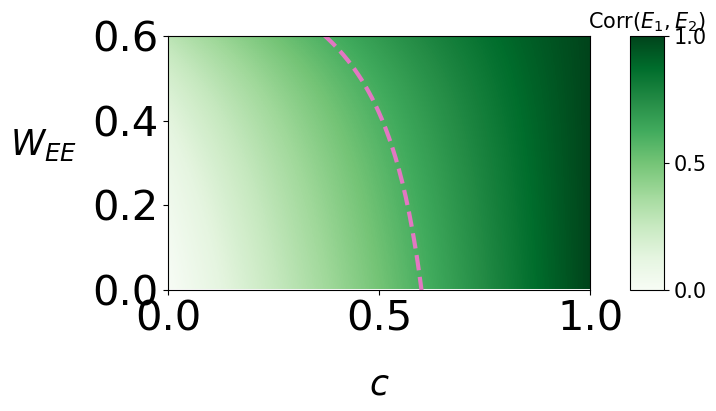

In [5]:
fig,ax = plt.subplots()

cmap = mp.colormaps['Greens']
cmap.set_bad(color='gray')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='8%', pad=.4)
im = ax.imshow(np.flip(Corrs_12, axis=0), cmap=cmap, vmin=0, vmax= 1, extent=[0, 1, 0, 0.6])
cbar=fig.colorbar(im, cax=cax, orientation='vertical')

c_vecSmall = np.linspace(0, 0.8, K)
j = jee_k_r(alpha, c_vecSmall, 0.6)[:,1]
ax.plot(c_vecSmall[j<1], j[j<1], 'C6--', linewidth=3)

ax.set_ylim((0, 0.6))
ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xlabel(r'$c$', fontsize=25, labelpad=20)
ax.set_ylabel(r'$W_{EE}$', rotation=0, fontsize=25, labelpad=35)
cbar.ax.yaxis.set_tick_params(labelsize=15)

cbar.ax.yaxis.set_ticks([0, 0.5,1.0])
plt.title(r'Corr$(E_1,E_2)$', fontsize=15)

plt.show()

### Fig 2C
#### Calculates inherited correlations vs. those brought on by recurrence for different path orders

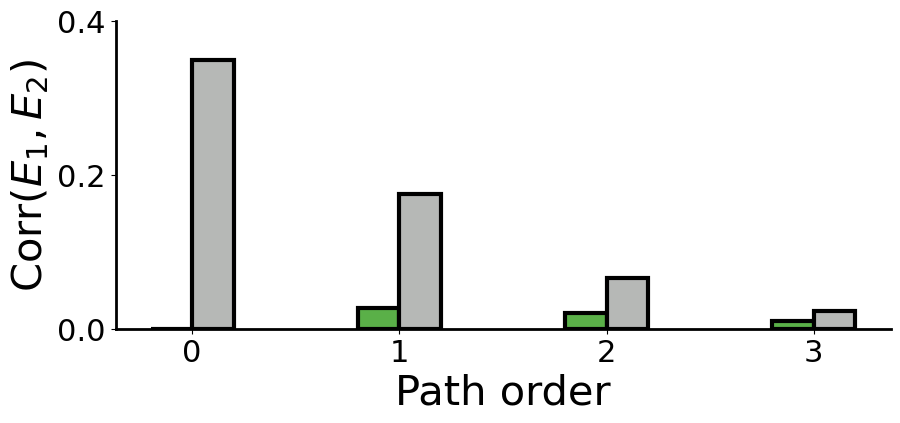

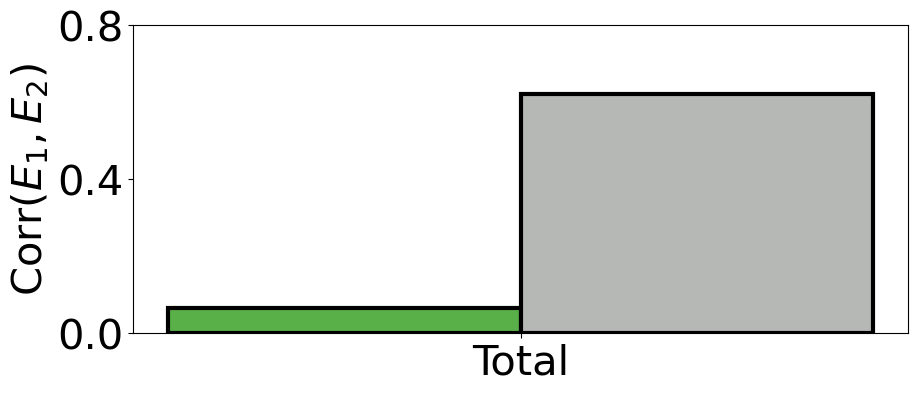

In [6]:
# Strength and structure of noise
sigE=1; sigI=1; c=0

# Excitatory sub-matrix 
Wee=0.25
alpha = 0.1
WExc = np.block([[Wee, alpha*Wee],
     [alpha*Wee, Wee]])

# Total number of orders to include in pathway expansion
totalOrders = 3

c = 0
D_private = np.diag([np.sqrt((1-c)*sigE), np.sqrt((1-c)*sigE)])
D_shared = np.array([np.sqrt(c)*sigE,np.sqrt(c)*sigE])
DMatrixExc = np.c_[D_private,D_shared]
# Do the expansion for each of the matrices above
covDataExc1, fullCovExc1 = covExpansion(WExc, DMatrixExc, totalOrders)
rho1 = np.sqrt(fullCovExc1[0,0]*fullCovExc1[1,1])

c = 0.65
D_private = np.diag([np.sqrt((1-c)*sigE), np.sqrt((1-c)*sigE)])
D_shared = np.array([np.sqrt(c)*sigE,np.sqrt(c)*sigE])
DMatrixExc = np.c_[D_private,D_shared]
# Do the expansion for each of the matrices above
covDataExc2, fullCovExc2 = covExpansion(WExc, DMatrixExc, totalOrders)
rho2 = np.sqrt(fullCovExc2[0,0]*fullCovExc2[1,1])


# Create the left panel
indicesInclude =[True, True, True, True]
corrDataRec = covDataExc1[indicesInclude]/rho2 # Recurrence
corrDataInh = covDataExc2[indicesInclude]/rho2-covDataExc1[indicesInclude]/rho2 # Inherited
  
fig, ax = plt.subplots(figsize=(10,4))
for i in range(len(indicesInclude)):      
    ax.bar(i-0.2+0.1, corrDataRec[i], width=0.2, edgecolor='black',linewidth=3, color='#5ab048')
    ax.bar(i+0.1, corrDataInh[i], width=0.2, edgecolor='black',linewidth=3, color='#b6b8b6')
    
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks([0, 1, 2, 3])
ax.tick_params(labelsize=22)
ax.yaxis.set_ticks([0, 0.2, 0.4])
ax.set_xlabel('Path order', fontsize=30)
ax.set_ylabel('Corr$(E_1,E_2)$', fontsize=30)
plt.show()

# Create the right panel
totalCorrelation = fullCovExc2[0,1]/np.sqrt(fullCovExc2[0,0]*fullCovExc2[1,1]);
recCorrelation = fullCovExc1[0,1]/np.sqrt(fullCovExc1[0,0]*fullCovExc1[1,1]);

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(-0.1, recCorrelation, width=0.2, edgecolor='black',linewidth=3, color='#5ab048')
ax.bar(0.1, totalCorrelation-recCorrelation, width=0.2, edgecolor='black',linewidth=3, color='#b6b8b6')

ax.set_ylabel('Corr$(E_1,E_2)$', fontsize=30)
ax.set_xticks([0])
ax.set_yticks([0, 0.4, 0.8])
ax.set_xticklabels(['Total'])
ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
plt.show()